<a href="https://colab.research.google.com/github/cu-applied-math/SciML-Class/blob/lab_solutions/Labs/lab01_gradientDescent_viaPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1
Write a gradient descent code in PyTorch to minimize a least-squares objective

In [ ]:
# https://pytorch.org/tutorials/beginner/examples_autograd/polynomial_custom_function.html
# also looking at https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html
# and https://machinelearningmastery.com/implementing-gradient-descent-in-pytorch/ for simple way to do it

import torch
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import math
import sys
import numpy as np
print("Torch version is", torch.__version__)
print("Numpy version is", np.__version__)
print("Python version is", sys.version)

Torch version is 2.3.0
Numpy version is 1.26.4
Python version is 3.11.9 (main, Apr 19 2024, 11:44:45) [Clang 14.0.6 ]


## Setup the function, and then experiment

In [ ]:
n = 30
d = 20
A = torch.randn( (n,d) )
b = torch.randn( (n,1) )

def f(x):
    return torch.linalg.norm( A @ x - b )**2

def gradient_by_hand(x):
    return 2*A.T @ (A @ x - b)

In [ ]:
# x = torch.randn( d, requires_grad=True ) # Careful, the shape (d,) is incompatible with the shape (d,1) that we used above
x = torch.randn( (d,1) , requires_grad=True )

f(x), f(x.detach() )

(tensor(1005.5995, grad_fn=<PowBackward0>), tensor(1005.5995))

In [ ]:
x.grad.data.zero_()

out = f(x)
out.backward() # calls autodiff
# x.grad # and then we can request the gradient (with respect to x)
g1 = x.grad.numpy() # note that this is float32 (i.e., single, not double, precision!)

g2 = gradient_by_hand(x.detach() )
# g2 = gradient_by_hand(x) # works, but since we don't need gradient, good practice to detach first
# g2 = gradient_by_hand(x.numpy() ) # won't work, must detach first

with np.printoptions(precision=2, suppress=True):
    print(np.hstack((g1,g2)))


[[ 0.71  0.71]
 [ 3.59  3.59]
 [-1.59 -1.59]
 [-1.97 -1.97]
 [ 0.02  0.02]
 [-2.99 -2.99]
 [-0.3  -0.3 ]
 [-1.69 -1.69]
 [-0.01 -0.01]
 [-1.08 -1.08]
 [ 1.32  1.32]
 [-0.84 -0.84]
 [-2.69 -2.69]
 [-1.78 -1.78]
 [-1.6  -1.6 ]
 [-1.35 -1.35]
 [ 0.04  0.04]
 [ 2.44  2.44]
 [-1.33 -1.33]
 [-2.28 -2.28]]


## Try running gradient descent (written ourselves)

In [ ]:
# Try gradient descent
L = torch.linalg.norm(A,ord=2)**2

stepsize = .5/L # since we don't have the factor of 1/2 in objective, need that here!
maxits   = int(1e3)
printEvery = 50
trueX    = torch.linalg.lstsq(A,b,rcond=None)[0]
error    = lambda x : torch.linalg.norm(x-trueX)

x = torch.zeros( (d,1) , requires_grad=True )
# x.grad.data.zero_()
lossHist = []
errHist  = []

for k in range(maxits):
    loss = f(x)
    lossHist.append( loss.item() )
    errHist.append( error(x.data) ) # both x and x.data work
    if k % printEvery == 0:
        print(f'Iteration {k+1:4d}, objective function is {loss.item():.2e}, error is {error(x.data):.2e}')

    loss.backward() # calls autodiff
    g = x.grad.data
    # alternatively:
    # g = gradient_by_hand(x.detach() ) # x.data or just x also work

    # take gradient descent step
    # x -= stepsize * g     # NO
    # x = x - stepsize * g  # NO.  After this, x.isleaf is false
    x.data = x.data - stepsize * g  # YES
    x.grad.data.zero_()


Iteration    1, objective function is 2.40e+01, error is 1.05e+00
Iteration   51, objective function is 8.30e+00, error is 1.29e-01
Iteration  101, objective function is 8.25e+00, error is 2.35e-02
Iteration  151, objective function is 8.25e+00, error is 5.04e-03
Iteration  201, objective function is 8.25e+00, error is 1.22e-03
Iteration  251, objective function is 8.25e+00, error is 3.22e-04
Iteration  301, objective function is 8.25e+00, error is 9.31e-05
Iteration  351, objective function is 8.25e+00, error is 2.90e-05
Iteration  401, objective function is 8.25e+00, error is 9.58e-06
Iteration  451, objective function is 8.25e+00, error is 3.39e-06
Iteration  501, objective function is 8.25e+00, error is 1.54e-06
Iteration  551, objective function is 8.25e+00, error is 9.52e-07
Iteration  601, objective function is 8.25e+00, error is 7.36e-07
Iteration  651, objective function is 8.25e+00, error is 6.80e-07
Iteration  701, objective function is 8.25e+00, error is 6.53e-07
Iteration 

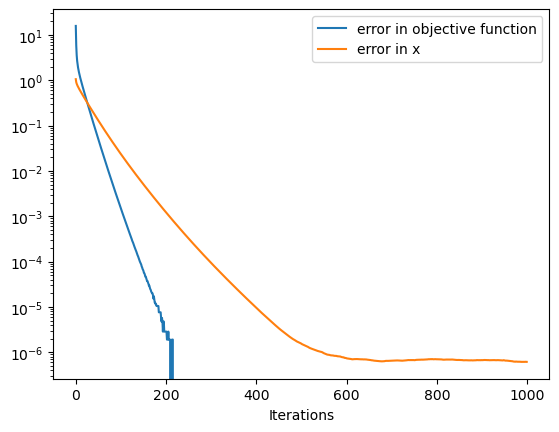

In [ ]:
plt.semilogy( np.array(lossHist) - f(trueX).item() , label='error in objective function')
plt.semilogy( errHist, label='error in x')
plt.xlabel('Iterations')
plt.legend()
plt.title('Using our own gradient descent')
plt.show()

## Try running one of the prebuilt optimizer classes in PyTorch

Iteration    1, objective function is 2.40e+01, error is 1.05e+00
Iteration   51, objective function is 8.30e+00, error is 1.29e-01
Iteration  101, objective function is 8.25e+00, error is 2.35e-02
Iteration  151, objective function is 8.25e+00, error is 5.04e-03
Iteration  201, objective function is 8.25e+00, error is 1.22e-03
Iteration  251, objective function is 8.25e+00, error is 3.22e-04
Iteration  301, objective function is 8.25e+00, error is 9.31e-05
Iteration  351, objective function is 8.25e+00, error is 2.90e-05
Iteration  401, objective function is 8.25e+00, error is 9.58e-06
Iteration  451, objective function is 8.25e+00, error is 3.41e-06
Iteration  501, objective function is 8.25e+00, error is 1.57e-06
Iteration  551, objective function is 8.25e+00, error is 9.08e-07
Iteration  601, objective function is 8.25e+00, error is 7.58e-07
Iteration  651, objective function is 8.25e+00, error is 7.00e-07
Iteration  701, objective function is 8.25e+00, error is 6.73e-07
Iteration 

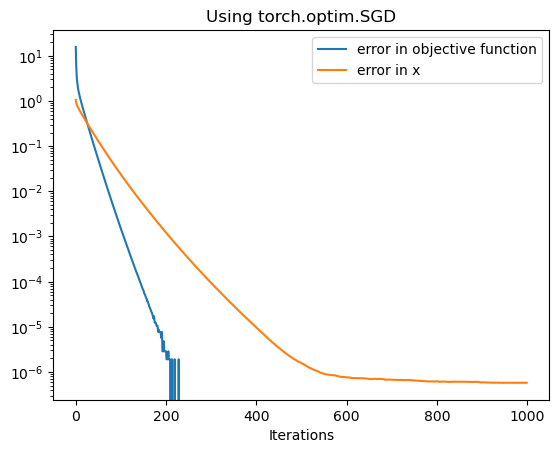

In [ ]:
x = torch.zeros( (d,1) , requires_grad=True )

optimizer = torch.optim.SGD( [x], lr = stepsize )
lossHist = []
errHist  = []
printEvery = 50
maxits   = int(1e3)

for k in range(maxits):
    optimizer.zero_grad()  # important!!

    loss = f(x)
    lossHist.append( loss.item() )
    errHist.append( error(x.data) ) # both x and x.data work
    if k % printEvery == 0:
        print(f'Iteration {k+1:4d}, objective function is {loss.item():.2e}, error is {error(x.data):.2e}')

    loss.backward()
    optimizer.step()  # this does the update on x for us


plt.semilogy( np.array(lossHist) - f(trueX).item() , label='error in objective function')
plt.semilogy( errHist, label='error in x')
plt.xlabel('Iterations')
plt.legend()
plt.title('Using torch.optim.SGD')
plt.show()


Iteration    1, objective function is 2.40e+01, error is 1.05e+00
Iteration    1, objective function is 2.39e+01, error is 1.05e+00
Iteration    1, objective function is 2.38e+01, error is 1.05e+00
Iteration    1, objective function is 2.36e+01, error is 1.05e+00
Iteration    1, objective function is 2.34e+01, error is 1.04e+00
Iteration    1, objective function is 2.33e+01, error is 1.04e+00
Iteration    1, objective function is 2.31e+01, error is 1.04e+00
Iteration    1, objective function is 2.30e+01, error is 1.03e+00
Iteration    1, objective function is 2.28e+01, error is 1.03e+00
Iteration    1, objective function is 2.26e+01, error is 1.03e+00
Iteration    1, objective function is 2.25e+01, error is 1.02e+00
Iteration    1, objective function is 2.23e+01, error is 1.02e+00
Iteration    1, objective function is 2.21e+01, error is 1.01e+00
Iteration    1, objective function is 2.20e+01, error is 1.01e+00
Iteration    1, objective function is 2.18e+01, error is 1.00e+00
Iteration 

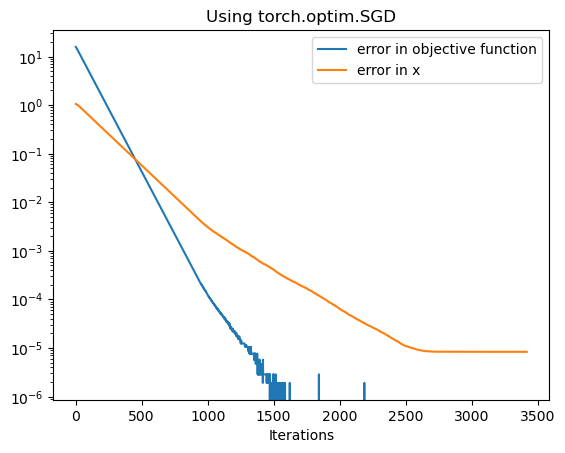

In [ ]:
x = torch.zeros( (d,1) , requires_grad=True )

optimizer = torch.optim.LBFGS( [x], lr = stepsize) # LBFGS needs a closure
lossHist = []
errHist  = []
printEvery = 50
maxits   = int(1e3)

for k in range(maxits):
    def closure():
        # LBFGS needs this; see https://stackoverflow.com/a/58059762
        loss = f(x)
        lossHist.append( loss.item() )
        errHist.append( error(x.data) ) # both x and x.data work
        if k % printEvery == 0:
            print(f'Iteration {k+1:4d}, objective function is {loss.item():.2e}, error is {error(x.data):.2e}')

        optimizer.zero_grad()
        loss.backward()
        return loss

    optimizer.step(closure)


plt.semilogy( np.array(lossHist) - f(trueX).item() , label='error in objective function')
plt.semilogy( errHist, label='error in x')
plt.xlabel('Iterations')
plt.legend()
plt.title('Using torch.optim.LBFGS')
plt.show()